In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Daten einlesen
col_names = ['contour number', 'aspect ratio', 'extent', 'Blue', 'Green', 'Red', 'Hue', 'class']
data = pd.read_csv("output.csv", skiprows=1, header=None, names=col_names)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Zeige die ersten 10 Zeilen der Daten
data.head(10)


,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
0,16,0.850735,0.762296,83.383101,143.296144,143.572600,38.485644,0
1,25,0.626242,0.763346,76.382386,75.957386,85.665909,150.730682,0
2,31,0.628238,0.695970,60.357078,114.183692,136.153077,15.567445,0
3,31,0.896541,0.800835,44.570000,117.787500,134.971667,17.529167,0
4,63,0.693736,0.824233,36.742411,117.234172,135.391154,17.088465,0
5,34,0.928571,0.808913,46.546503,110.883922,126.844989,18.361932,0
6,68,0.979804,0.836557,63.621205,104.295904,104.446747,29.446747,0
7,51,0.760961,0.823015,59.701164,99.514131,103.025769,32.987531,0
8,31,0.957265,0.767948,50.077372,116.466180,137.658394,22.445255,0
9,50,0.828162,0.845766,60.658955,104.919383,113.961094,34.713985,0


In [3]:
# Isolation Forest-Anomalieerkennung
X = data.iloc[:, :-1]  # Alle Spalten außer der letzten (Klasse)
iForest_clf = IsolationForest(random_state=0).fit(X)
data['anomaly_iforest'] = iForest_clf.predict(X)

In [4]:
# KMeans-Clustering
kmeans = KMeans(n_clusters=3)
data['cluster_kmeans'] = kmeans.fit_predict(X)

/home/michelle/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
data['cluster_dbscan'] = dbscan.fit_predict(X)


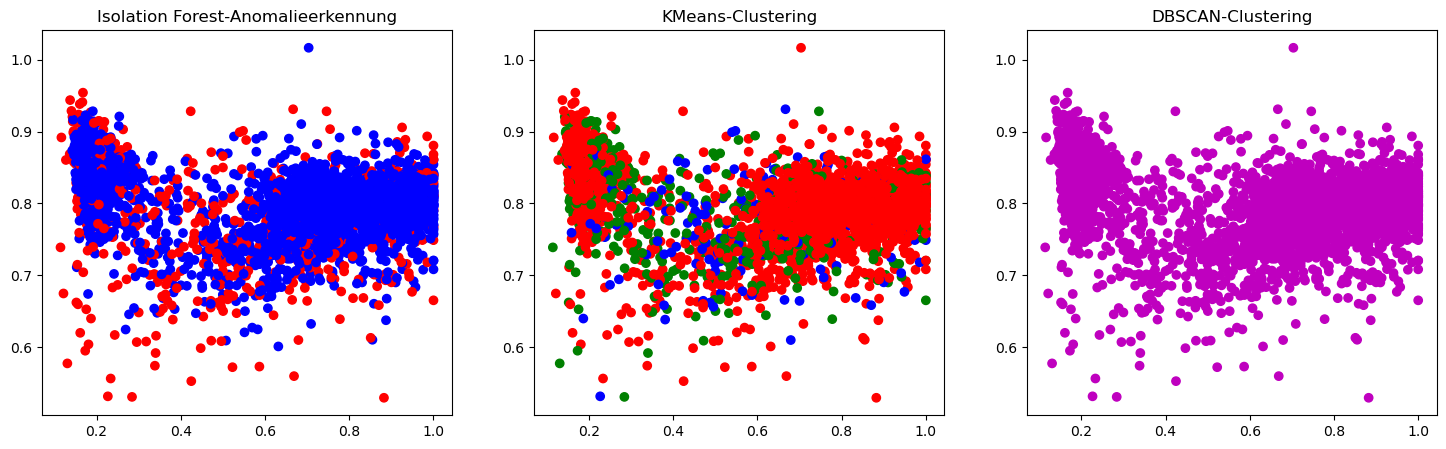

In [6]:
# Visualisierung
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Isolation Forest-Plot
colors_iforest = {1: 'b', -1: 'r'}  # 1 für normale, -1 für Ausreißer
axes[0].scatter(X['aspect ratio'], X['extent'], color=[colors_iforest[label] for label in data['anomaly_iforest']])
axes[0].set_title('Isolation Forest-Anomalieerkennung')

# KMeans-Plot
colors_kmeans = {0: 'r', 1: 'g', 2: 'b'}
axes[1].scatter(X['aspect ratio'], X['extent'], color=[colors_kmeans[label] for label in data['cluster_kmeans']])
axes[1].set_title('KMeans-Clustering')

# DBSCAN-Plot
colors_dbscan = {0: 'r', 1: 'g', 2: 'b', -1: 'm'}
axes[2].scatter(X['aspect ratio'], X['extent'], color=[colors_dbscan[label] for label in data['cluster_dbscan']])
axes[2].set_title('DBSCAN-Clustering')

plt.show()